### Generating Planar Graphs 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import gcol

In [2]:
def make_planar_graph(n, seed=None):
    # Function for making a dense planar graph by placing nodes randomly
    # into the unit square, including corners
    assert n >= 4, "n parameter must be at least 4"
    import random
    from scipy.spatial import Delaunay
    random.seed(seed)
    P = [(0,0), (1,0), (0,1), (1, 1)]
    for i in range(4, n):
        P.append((random.uniform(0.05,0.95), random.uniform(0.05,0.95)))
    T = Delaunay(P).simplices.copy()
    G = nx.Graph()
    for v in range(n):
        G.add_node(v, pos=(P[v][0], P[v][1]))
    for x, y, z in T:
        G.add_edges_from([(x, y), (x, z), (y, z)])
    return G

Number of nodes  = 50
Number of edges  = 143
Number of faces  = 95
Number of colors = 5


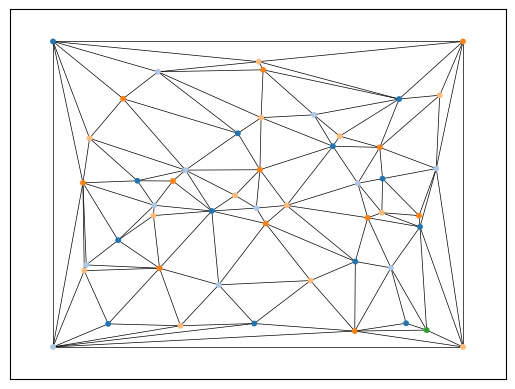

Number of nodes  = 100
Number of edges  = 293
Number of faces  = 195
Number of colors = 5


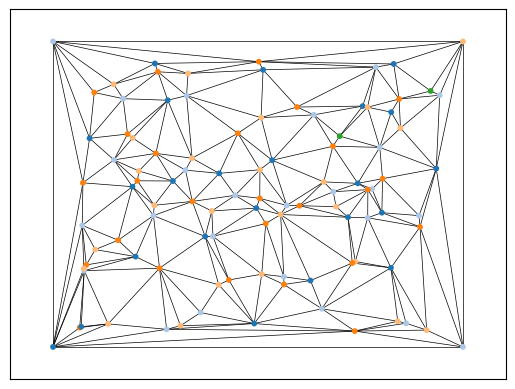

In [4]:
for n in range(50, 1000, 50):
    G = make_planar_graph(n, seed=1)

    filename = './generated/graph_'+str(n)+'.txt'
    nx.write_edgelist(G, filename)
    with open(filename, 'r') as original:
        data = original.read()
    with open(filename, 'w') as modified:
        modified.write(str(n) + "\n" + str(G.number_of_edges()) + "\n" + data)
    
    if n <= 100: 
        pos = nx.get_node_attributes(G, "pos")
        c = gcol.node_coloring(G)
        print("Number of nodes  =", n)
        print("Number of edges  =", G.number_of_edges())
        print("Number of faces  =", 2- n + G.number_of_edges())
        print("Number of colors =", max(c.values()) + 1)
        nx.draw_networkx(G,
                 pos=pos,
                 node_color=gcol.get_node_colors(G, c),
                 with_labels=False,
                 width=0.5,
                 node_size=10)
        plt.show()